In [3]:
import pandas as pd

In [4]:
Data = pd.read_csv(r"D:\ALGORITMO RECLUTADOR\Todo el proyecto\Data Posición\Medios.csv")
pd.set_option('display.max_columns', None)

In [5]:
print(Data.columns)


Index(['Name', 'Goals', 'Successful dribbles %', 'Total shots',
       'Set piece conversion %', 'Tackles', 'Interceptions',
       'Penalty committed', 'Clearances', 'Dribbled past',
       'Big chances created', 'Assists', 'Total passes', 'Accurate passes %',
       'Accurate final third passes', 'Accurate long balls %', 'Yellow cards',
       'Red cards', 'Aerial duels won %', 'Total duels won %', 'Was fouled',
       'Fouls', 'Appearances', 'Age Range', 'Position', 'League', 'Level'],
      dtype='object')


In [6]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

Columna_habilidades = Data.columns.drop(["Name", "League"])

features = Data[Columna_habilidades]

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta el escalador a tus datos y luego transforma tus datos
features_scaled = scaler.fit_transform(features)

# Inicializa el modelo NearestNeighbors
model = NearestNeighbors(n_neighbors=6, algorithm = "auto")  # Buscamos 6 vecinos porque uno de ellos será el jugador mismo

# Ajusta el modelo a tus datos
model.fit(features_scaled)


NearestNeighbors(n_neighbors=6)

In [7]:
Data.columns

Index(['Name', 'Goals', 'Successful dribbles %', 'Total shots',
       'Set piece conversion %', 'Tackles', 'Interceptions',
       'Penalty committed', 'Clearances', 'Dribbled past',
       'Big chances created', 'Assists', 'Total passes', 'Accurate passes %',
       'Accurate final third passes', 'Accurate long balls %', 'Yellow cards',
       'Red cards', 'Aerial duels won %', 'Total duels won %', 'Was fouled',
       'Fouls', 'Appearances', 'Age Range', 'Position', 'League', 'Level'],
      dtype='object')

In [8]:
caracteristicas_grafico = ['Goals', 'Accurate final third passes','Interceptions', 'Big chances created','Assists','Was fouled', 'Fouls']

In [9]:
# Calculando la mediana de las columnas de interés, excluyendo 'Name' y 'League'
Data['mediana'] = Data.drop(['Name', 'League'], axis=1).median(axis=1)
Data['mediana']

0       2.00
1       1.94
2       0.50
3       2.33
4       0.93
        ... 
9329    0.00
9330    0.00
9331    0.00
9332    0.00
9333    0.00
Name: mediana, Length: 9334, dtype: float64

In [12]:
Data['mediana'].describe()

count    9334.000000
mean        0.916953
std         0.501212
min         0.000000
25%         0.600000
50%         1.000000
75%         1.210000
max         2.970000
Name: mediana, dtype: float64

In [16]:
import unicodedata
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Función para normalizar nombres (ignorar mayúsculas y acentos)
def normalizar_nombre(nombre):
    nombre = nombre.lower()
    nombre = unicodedata.normalize('NFD', nombre)
    nombre = nombre.encode('ascii', 'ignore').decode("utf-8")
    return nombre

def buscar_jugadores_similares(nombre, caracteristicas_grafico):
    # Normaliza el nombre que buscas
    nombre_normalizado = normalizar_nombre(nombre)

    # Aplica la normalización a los nombres en el conjunto de datos
    Data['Name_Normalized'] = Data['Name'].apply(normalizar_nombre)

    # Busca el jugador con el nombre normalizado
    jugador = Data[Data['Name_Normalized'] == nombre_normalizado]

    if len(jugador) == 0:
        return 'Jugador no encontrado'
    else:
        jugador_scaled = scaler.transform(jugador[features.columns])
        distancias, indices = model.kneighbors(jugador_scaled)
        jugadores_similares = Data.iloc[indices[0][1:]]  # Excluimos el primer resultado porque será el jugador mismo

        # Escala todas las características de los jugadores similares
        jugadores_similares_scaled = scaler.transform(jugadores_similares[features.columns])

        # Define una lista de colores
        colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

        # Crea un gráfico de radar para cada jugador similar
        fig = go.Figure()
        for i, row in enumerate(jugadores_similares_scaled):
            color = colores[i % len(colores)]  # Elige un color de la lista
            fig.add_trace(go.Scatterpolar(
                r=row[features.columns.isin(caracteristicas_grafico)],
                theta=caracteristicas_grafico,
                fill='toself',
                name=jugadores_similares.iloc[i]['Name'],
                line=dict(color=color)
            ))

        fig.update_layout(
            autosize=False,
            width=800,
            height=800,
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[-2, 10]  # Ajusta este rango según tus datos
                )),
            showlegend=True
        )
        fig.show()

        # Crea un gráfico de dispersión para la mediana
        plt.figure(figsize=(10, 6))
        for i, name in enumerate(jugadores_similares['Name']):
            plt.scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'mediana'],
                        color=colores[i % len(colores)], marker='o')
        for line in [3.00, 1.50, 0.01]:
            plt.axhline(y=line, color='r', linestyle='--')
        plt.title('Mediana de los jugadores similares')
        plt.xticks(range(len(jugadores_similares)), jugadores_similares['Name'], rotation=360)
        plt.xlabel('Jugadores')
        plt.ylabel('Mediana')
        plt.show()

        return jugadores_similares

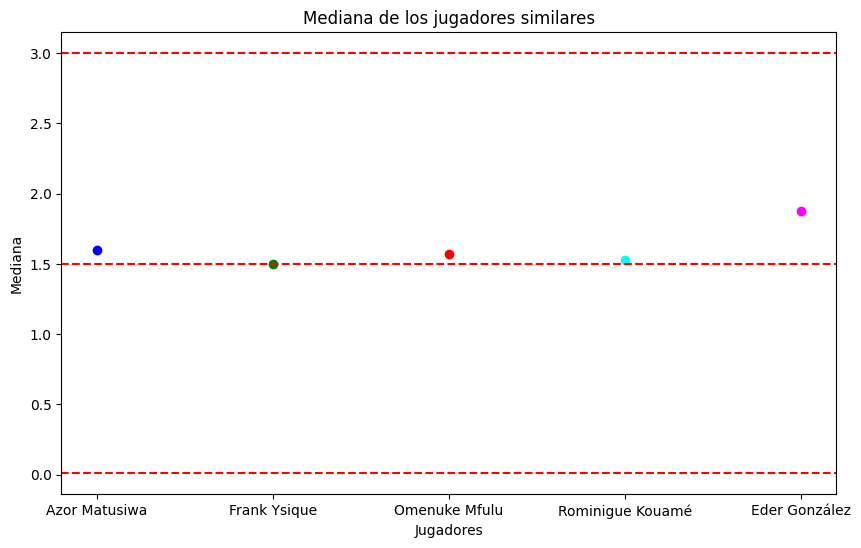

,Name,Goals,Successful dribbles %,Total shots,Set piece conversion %,Tackles,Interceptions,Penalty committed,Clearances,Dribbled past,Big chances created,Assists,Total passes,Accurate passes %,Accurate final third passes,Accurate long balls %,Yellow cards,Red cards,Aerial duels won %,Total duels won %,Was fouled,Fouls,Appearances,Age Range,Position,League,Level,mediana,Name_Normalized
3919,Azor Matusiwa,0.00,76.19,0.37,0.0,2.20,1.53,0.0,1.60,0.83,0.03,0.00,53.30,85.68,9.77,68.90,0.13,0.00,47.76,55.06,1.10,1.43,30,2,3,Francia Liga 1,2,1.60,azor matusiwa
1037,Frank Ysique,0.00,60.00,0.30,0.0,1.60,1.43,0.0,0.67,0.57,0.03,0.07,45.57,88.30,8.43,72.73,0.17,0.00,38.46,52.88,1.33,1.50,30,2,3,Peru Liga 1,3,1.50,frank ysique
3736,Omenuke Mfulu,0.00,71.88,0.47,0.0,1.57,1.77,0.0,0.83,1.00,0.00,0.00,55.27,90.23,9.40,47.62,0.20,0.03,48.00,53.51,1.30,1.17,30,2,3,La Liga 2,2,1.57,omenuke mfulu
3947,Rominigue Kouamé,0.03,76.92,0.75,0.0,1.38,1.53,0.0,1.44,0.75,0.09,0.03,43.56,89.10,8.13,80.00,0.28,0.00,50.00,55.07,1.50,1.63,32,2,3,Francia Liga 1,2,1.53,rominigue kouame
4351,Eder González,0.00,58.33,0.91,0.0,1.88,1.50,0.0,1.00,0.84,0.09,0.06,56.84,87.91,8.56,68.38,0.22,0.00,46.67,56.72,2.25,1.41,32,2,3,Grecia Stoiximan Super League,3,1.88,eder gonzalez


In [17]:
buscar_jugadores_similares('Iker Undabarrena', caracteristicas_grafico)